# Potato Disease Classification

Dataset credits: https://www.kaggle.com/arjuntejaswi/plant-village

### Import all the Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


### Import data into tensorflow dataset object

Used splitfolders tool to split dataset into training, validation and test directories.

$ pip install split-folders

$ splitfolders --ratio 0.8 0.1 0.1 -- .PlantVillage/


In [2]:
import splitfolders
splitfolders.ratio("C:\Project\potato-disease-classification\PlantVillage", output="dataset",
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False) 


In [3]:
IMAGE_SIZE = 256
CHANNELS = 3

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)


Found 1721 images belonging to 3 classes.


In [5]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [6]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.5923979  0.5610254  0.6120058 ]
  [0.58191735 0.5505448  0.6015252 ]
  [0.57880974 0.5474372  0.5984176 ]
  ...
  [0.5745136  0.53137636 0.5627489 ]
  [0.5778253  0.53468806 0.5660606 ]
  [0.581137   0.53799975 0.5693723 ]]

 [[0.59381723 0.5624447  0.6134251 ]
  [0.5828635  0.55149096 0.60247135]
  [0.5778635  0.54649097 0.59747136]
  ...
  [0.60100806 0.5578708  0.58924335]
  [0.60290045 0.5597632  0.59113574]
  [0.60479283 0.5616556  0.5930281 ]]

 [[0.5952365  0.56386393 0.6148443 ]
  [0.58380973 0.5524372  0.6034176 ]
  [0.57691735 0.5455448  0.5965252 ]
  ...
  [0.61501616 0.5718789  0.60325146]
  [0.61359686 0.5704596  0.60183215]
  [0.6121776  0.56904036 0.6004129 ]]

 ...

 [[0.47609225 0.42903343 0.4682491 ]
  [0.47703844 0.42997962 0.4691953 ]
  [0.47798464 0.43092582 0.4701415 ]
  ...
  [0.42936224 0.3705387  0.3979897 ]
  [0.4533899  0.39456636 0.42201734]
  [0.44762015 0.38879663 0.4162476 ]]

 [[0.46209124 0.41503242 0.4542481 ]
  [0.45925266 0.41219383 0.45140952]


In [8]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [9]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 216 images belonging to 3 classes.


In [10]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.4875167  0.47183043 0.5267323 ]
  [0.49077192 0.47508565 0.52998763]
  [0.4940272  0.47834092 0.5332429 ]
  ...
  [0.07023097 0.07415254 0.04990858]
  [0.06908948 0.0733139  0.0404271 ]
  [0.09729393 0.10513707 0.05415667]]

 [[0.4175189  0.40183264 0.4567346 ]
  [0.42988887 0.4142026  0.46910456]
  [0.44225886 0.4265726  0.48147455]
  ...
  [0.06957991 0.07350149 0.04795543]
  [0.07429789 0.07917336 0.0430313 ]
  [0.09534078 0.10318392 0.05220352]]

 [[0.40107185 0.38538557 0.44028753]
  [0.403025   0.38733873 0.4422407 ]
  [0.40497816 0.38929188 0.44419384]
  ...
  [0.06892887 0.07285044 0.04600227]
  [0.0795063  0.08503282 0.0456355 ]
  [0.09338763 0.10123076 0.05025037]]

 ...

 [[0.7434571  0.73561394 0.7905159 ]
  [0.7279885  0.72014534 0.7750473 ]
  [0.72609305 0.7182499  0.7731519 ]
  ...
  [0.66410637 0.6601848  0.71508676]
  [0.6543406  0.65041906 0.705321  ]
  [0.64457476 0.6406532  0.6955552 ]]

 [[0.74085283 0.7330097  0.78791165]
  [0.7253843  0.7175411  0.7724431 ]


## Building the Model

In [11]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

c:\Users\om\anaconda3\envs\disease\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [14]:
1506/32

47.0625

In [15]:
215/32

6.71875

In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20


c:\Users\om\anaconda3\envs\disease\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.4718 - loss: 0.9736 - val_accuracy: 0.5365 - val_loss: 0.8878
Epoch 2/20
 7/47 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.4991 - loss: 0.8702

c:\Users\om\anaconda3\envs\disease\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 221ms/step - accuracy: 0.5531 - loss: 0.8748 - val_accuracy: 0.4783 - val_loss: 0.8392
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 239s 5s/step - accuracy: 0.5540 - loss: 0.8300 - val_accuracy: 0.7135 - val_loss: 0.6099
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 335ms/step - accuracy: 0.7718 - loss: 0.5341 - val_accuracy: 0.8261 - val_loss: 0.3538
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 167s 3s/step - accuracy: 0.7944 - loss: 0.4526 - val_accuracy: 0.7292 - val_loss: 0.6720
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 326ms/step - accuracy: 0.8288 - loss: 0.3959 - val_accuracy: 0.8696 - val_loss: 0.3670
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 150s 3s/step - accuracy: 0.8755 - loss: 0.3464 - val_accuracy: 0.8802 - val_loss: 0.3676
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 431ms/step - accuracy: 0.8665 - loss: 0.2635 - val_accuracy: 0.9565 - val_loss: 0.1635
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.8920 - loss: 0.2516 - val_accuracy: 0.8906 - val_l

In [17]:
scores = model.evaluate(test_generator)

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 754ms/step - accuracy: 0.9191 - loss: 0.2064


In [18]:
scores

[0.211369588971138, 0.9120370149612427]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [19]:
history

In [20]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [21]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [22]:
type(history.history['loss'])

list

In [23]:
len(history.history['loss'])

20

In [24]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9387543797492981,
 0.8756266832351685,
 0.760421872138977,
 0.5270416140556335,
 0.4267888069152832]

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [26]:
val_acc

[0.5364583134651184,
 0.47826087474823,
 0.7135416865348816,
 0.8260869383811951,
 0.7291666865348816,
 0.8695651888847351,
 0.8802083134651184,
 0.95652174949646,
 0.890625,
 0.95652174949646,
 0.9010416865348816,
 1.0,
 0.90625,
 1.0,
 0.921875,
 0.8695651888847351,
 0.9375,
 1.0,
 0.9375,
 0.9130434989929199]

In [27]:
acc

[0.4776219129562378,
 0.5625,
 0.611890435218811,
 0.7767857313156128,
 0.816967248916626,
 0.8303571343421936,
 0.8757514953613281,
 0.8660714030265808,
 0.900467574596405,
 0.9464285969734192,
 0.9185037016868591,
 0.9464285969734192,
 0.9271876811981201,
 0.90625,
 0.9365397691726685,
 0.9151785969734192,
 0.9425517916679382,
 0.9598214030265808,
 0.9541223645210266,
 0.9539170265197754]

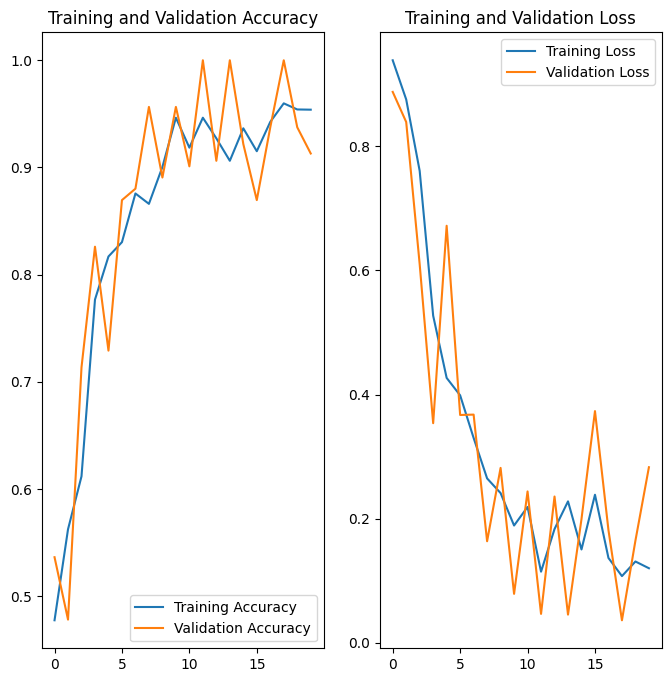

In [28]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

In [33]:
import numpy as np

### Write a function for inference

In [30]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


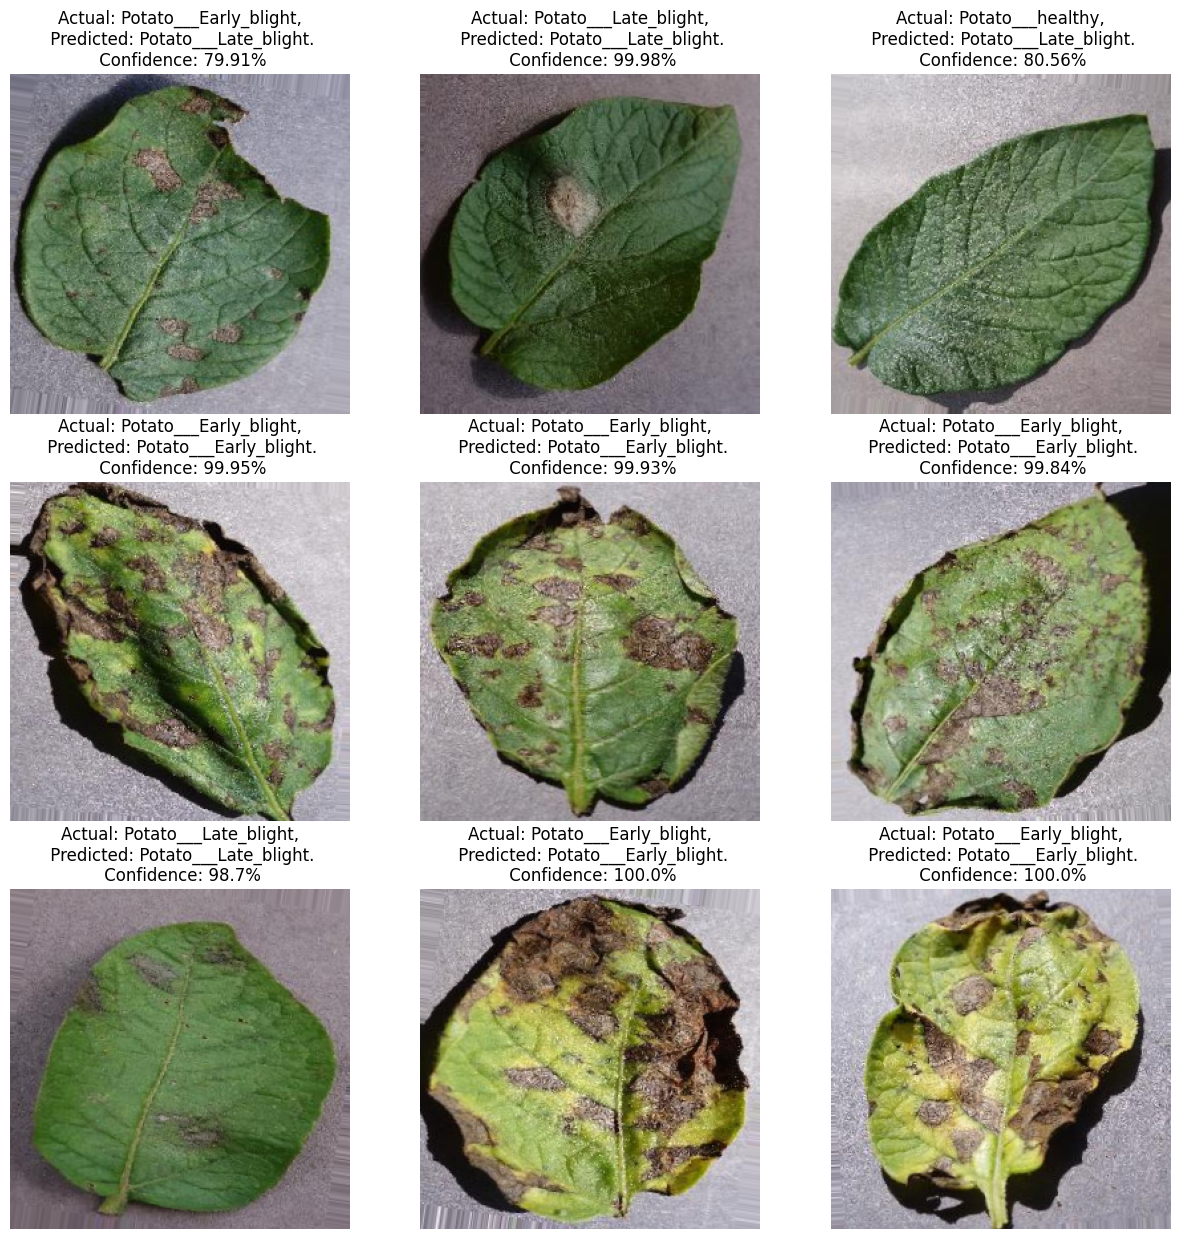

In [31]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [32]:
model.save("../potatoes.h5")